In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('dados/pns2019.csv', delimiter=",", encoding='latin1', nrows=20000)

In [27]:
df

,V0001,V0024,UPA_PNS,V0006_PNS,V0015,V0020,V0022,V0026,V0031,V0025A,...,VDE002,VDE014,VDF002,VDF003,VDF004,VDL001,VDM001,VDP001,VDR001,VDDATA
0,11,1110011,110000016,1,1,2019,6.0,1,1,1.0,...,1.0,6.0,2098.0,350.0,2.0,NaN,NaN,NaN,NaN,20210825
1,11,1110011,110000016,1,1,2019,6.0,1,1,0.0,...,NaN,NaN,2098.0,350.0,2.0,NaN,NaN,NaN,NaN,20210825
2,11,1110011,110000016,1,1,2019,6.0,1,1,0.0,...,1.0,4.0,2098.0,350.0,2.0,NaN,NaN,NaN,NaN,20210825
3,11,1110011,110000016,1,1,2019,6.0,1,1,9.0,...,NaN,NaN,2098.0,350.0,2.0,NaN,NaN,NaN,NaN,20210825
4,11,1110011,110000016,1,1,2019,6.0,1,1,9.0,...,NaN,NaN,2098.0,350.0,2.0,NaN,NaN,NaN,NaN,20210825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,13,1310212,130050631,1,1,2019,3.0,1,1,9.0,...,NaN,NaN,2500.0,833.0,3.0,NaN,NaN,NaN,NaN,20210825
19996,13,1310212,130050631,2,1,2019,3.0,1,1,1.0,...,2.0,NaN,200.0,67.0,1.0,NaN,NaN,NaN,NaN,20210825
19997,13,1310212,130050631,2,1,2019,3.0,1,1,0.0,...,1.0,11.0,200.0,67.0,1.0,NaN,NaN,NaN,NaN,20210825
19998,13,1310212,130050631,2,1,2019,3.0,1,1,9.0,...,NaN,NaN,200.0,67.0,1.0,NaN,NaN,NaN,NaN,20210825


In [28]:
df.dropna(subset=['Q092','C006','C00703','C009','C011','M01401','M01501', 'M01601', 'M01901', 'N001', 'N010','N011','N012','N014','N016','N017','N018','P027','P034','P050','V00201','V00203','H001'],inplace=True)
df = df.drop_duplicates()

In [29]:
base = df[['Q092', 'C006', 'C00703', 'D00901', 'C009','C011','M01401','M01501', 'M01601', 'M01901', 
           'N001', 'N010','N011','N012', 'N013', 'N014', 'N015', 'N016','N017','N018','P027',
           'P034','P050','V00201','V00203','H001']]

# D00901 = Grau de estuddo 01 creche 15 doutorado

# Q046013 = Praticar ativ física regular

# Q046014 = Não fumar

# Q046015 = Não beber em excesso

# VDF004 = Renda per capita

# E024021 = Número de meses ate conseguir o trabalho

#C06 - SEXO

#C00703 - ANO DE NASCIMENTO

#C009 - COR 

#C011 - ESTADO CIVIL

#M01401 - Com quantos familiares ou parentes ___ pode contar em momentos bons ou ruins

#M01501 - Com quantos amigos próximos ___ pode contar em momentos bons ou ruins (Sem considerar os familiares ou parentes

#M01601 - Nos últimos doze meses, com que frequência o(a) Sr(a) se reuniu com outras pessoas para prática de atividades esportivas, exercícios físicos, recreativos ou artísticos

#M01901 - Nos últimos doze meses, com que frequência o(a) Sr(a) compareceu a atividades coletivas da sua religião ou de outra religião sem contar com situações como casamento, batizado, ou enterro)

#N001 - Em geral, como o(a) Sr(a) avalia a sua saúde

#N010 - Nas duas últimas semanas, com que frequência o(a) Sr(a) teve problemas no sono, como dificuldade para adormecer, acordar frequentemente à noite ou dormir mais do que de costume?

#N011 - Nas duas últimas semanas, com que frequência o(a) Sr(a) teve problemas por não se sentir descansado(a) e disposto(a) durante o dia, sentindo-se cansado(a), sem ter energia? 

#N012 - Nas duas últimas semanas, com que frequência o(a) Sr(a) teve pouco interesse ou não sentiu prazer em fazer as coisas? 

#N014 - Nas duas últimas semanas, com que frequência o(a) Sr(a) teve problemas na alimentação, como ter falta de apetite ou comer muito mais do que de costume?

#N016 - Nas duas últimas semanas, com que frequência o(a) Sr(a) se sentiu deprimido(a), “pra baixo” ou sem perspectiva?

#N017 - Nas duas últimas semanas, com que frequência o(a) Sr(a) se sentiu mal consigo mesmo, se achando um fracasso ou achando que decepcionou sua família?

#N018 - Nas duas últimas semanas, com que frequência o(a) Sr(a) pensou em se ferir de alguma maneira ou achou que seria melhor estar morto?

#P027 - Com que frequência o(a) Sr(a) costuma consumir alguma bebida alcoólica?

#P034 - Nos últimos três meses, o(a) Sr(a) praticou algum tipo de exercício físico ou esporte? 

#P050 - Atualmente, o(a) Sr(a) fuma algum produto do tabaco? 

#V00201 - Nos últimos doze meses, alguém: Te ofendeu, humilhou ou ridicularizou na frente de outras pessoas?

#V00203 - Nos últimos doze meses, alguém: Usou redes sociais ou celular para ameaçar, ofender, xingar ou expor imagens suas sem o seu consentimento?

#H001 - Quando foi a última vez que o(a) sr(a) consultou com um(a) médico(a)?

In [30]:
base['D00901'].unique()

array([ 5., 10.,  4., nan,  7., 14., 12., 13.,  3., 11.,  8.,  6.,  2.,
       15.,  9.])

In [31]:
def mapear_cor(x):
    if x == 1:
        return 1 # Branco
    elif x == 2:
        return 2 # Preto + pardo
    elif  x == 4:
        return 2
    else:
        return 3 # Outros - Amarelo, indígena, ignorado (poucas instâncias)

# Aplicar a função de mapeamento à coluna
base['C009'] = base['C009'].apply(mapear_cor)

/tmp/ipykernel_20423/3656742440.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['C009'] = base['C009'].apply(mapear_cor)


In [32]:
# Definindo o número de colunas
##num_cols = len(base.columns)

# Definir o layout para os gráficos
#fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(8, num_cols*4))

# Iterar sobre cada coluna categórica e gerar um gráfico de barras
#for i, col in enumerate(base.columns):
    #sns.countplot(data=base, x=col, ax=axes[i])
    #axes[i].set_title(f'Contagem de {col}')
    #axes[i].set_xlabel(f'{col}')
    #axes[i].set_ylabel('Frequência')

#plt.tight_layout()
#plt.show()

In [33]:
col = base.pop('Q092')
base.insert(len(base.columns), 'Q092', col)

In [34]:
base.isnull().sum()

C006         0
C00703       0
D00901    1046
C009         0
C011         0
M01401       0
M01501       0
M01601       0
M01901       0
N001         0
N010         0
N011         0
N012         0
N013         0
N014         0
N015         0
N016         0
N017         0
N018         0
P027         0
P034         0
P050         0
V00201       0
V00203       0
H001         0
Q092         0
dtype: int64

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [36]:
cols_label_encode = ['Q092', 'C006', 'C00703', 'D00901', 'M01401','M01501', 'M01601', 'M01901', 
           'N001', 'N010','N011','N012', 'N013', 'N014', 'N015', 'N016','N017','N018','P027',
           'P034','P050','V00201','V00203','H001']
base[cols_label_encode] = base[cols_label_encode].apply(LabelEncoder().fit_transform)

/tmp/ipykernel_20423/186344592.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base[cols_label_encode] = base[cols_label_encode].apply(LabelEncoder().fit_transform)


In [37]:
cols_onehot_encode = ['C009', 'C011']

# Ajustar o OneHotEncoder com base no conjunto de treino
transformer = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), cols_onehot_encode)],
    remainder='passthrough'
)

# Aplicar fit_transform no conjunto de treino
base_encoded = transformer.fit_transform(base)

In [38]:
X_prev= base_encoded[:, :-1]
y_classe = base_encoded[:, -1]
X_prev

array([[1., 0., 0., ..., 1., 1., 1.],
       [0., 1., 0., ..., 1., 1., 2.],
       [0., 1., 0., ..., 1., 1., 3.],
       ...,
       [0., 1., 0., ..., 1., 1., 3.],
       [0., 1., 0., ..., 1., 1., 1.],
       [0., 1., 0., ..., 1., 1., 2.]])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 0)

In [40]:
from sklearn.impute import KNNImputer

In [41]:
imputer = KNNImputer(n_neighbors=3)

# Imputar os dados no conjunto de treino
X_train = imputer.fit_transform(X_train)

In [42]:
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

In [43]:
# Aplicando SMOTETomek (oversampling + undersampling)
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

#balanceamento_under = TomekLinks(sampling_strategy='auto')
#X_resampled, y_resampled = balanceamento_under.fit_resample(X_train, y_train)

#undersample = RandomUnderSampler(random_state=42)
#X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

In [44]:
import pickle

In [45]:
with open('dados/depresso.pkl', mode = 'wb') as f:
  pickle.dump([X_resampled, X_test, y_resampled, y_test], f)

--------------------FIM DO PROCESSAMENTO--------------------



In [46]:
with open('dados/depresso.pkl', 'rb') as f:
  X_prev, X_test, y_classe, y_test = pickle.load(f)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [48]:
param_distrib = {
    'n_estimators': [100], # Número de árvores
    'max_depth': [2, 4, 6, 8],
    'max_features': ['sqrt', 'log2', 4, 5], # Intervalo para o número máximo de features
    'criterion': ['gini', 'entropy']   # Critérios de divisão
}

In [49]:
modelo_rf = RandomForestClassifier(random_state=42, class_weight='balanced')

In [50]:
modelo = RandomizedSearchCV(
    modelo_rf, param_distributions=param_distrib,
    n_iter=100, cv=5, scoring='recall', random_state=42
)

In [51]:
modelo.fit(X_prev, y_classe)

/home/eduardoavs/.local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


/home/eduardoavs/.local/lib/python3.10/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 6, 8],
                                        'max_features': ['sqrt', 'log2', 4, 5],
                                        'n_estimators': [100]},
                   random_state=42, scoring='recall')

In [52]:
melhor_modelo = modelo.best_estimator_

In [53]:
previsoes = melhor_modelo.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,previsoes)

0.9206773618538324

In [55]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_test, previsoes)

array([[  18,   42],
       [  47, 1015]])

np.float64(0.955743879472693)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

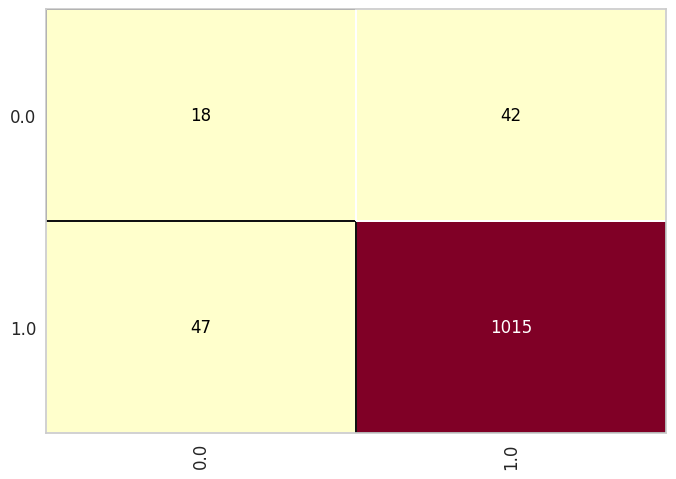

In [56]:
cm = ConfusionMatrix(modelo)
cm.fit(X_prev, y_classe)
cm.score(X_test, y_test)

In [57]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

         0.0       0.28      0.30      0.29        60
         1.0       0.96      0.96      0.96      1062

    accuracy                           0.92      1122
   macro avg       0.62      0.63      0.62      1122
weighted avg       0.92      0.92      0.92      1122



In [58]:
# Obter a importância das features
importancias = melhor_modelo.feature_importances_

# Criar uma lista com os nomes das features (substitua pelos nomes corretos)
nomes_das_features = ['C006','C00703', 'D00901', 'C009','C011','M01401','M01501', 'M01601', 'M01901', 
           'N001', 'N010','N011','N012', 'N013', 'N014', 'N015', 'N016','N017','N018','P027',
           'P034','P050','V00201','V00203','H001']
# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_prev.shape[1]), importancias[indices_ordenados], align="center")
plt.yticks(range(X_prev.shape[1]), [nomes_das_features[i] for i in indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()

Variáveis mais relevantes:
M01601: 0.1316193334519269
N015: 0.12584960989592395
P050: 0.11796520775137266
N018: 0.08396601419764999
N016: 0.06716736289317177
N014: 0.060427281006396084
V00201: 0.05114166286729743


IndexError: list index out of range